### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
haberman_df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
haberman_df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 
Analyze high level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [3]:
print (haberman_df.shape, "\n")
print (haberman_df.columns, "\n")
print("Total survival status class count:\n",haberman_df["survival_status"].value_counts(),"\n")
print("Data description: \n", haberman_df.describe(), "\n")

(306, 4) 

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object') 

Total survival status class count:
 1    225
2     81
Name: survival_status, dtype: int64 

Data description: 
               age  operation_Year  axil_nodes  survival_status
count  306.000000      306.000000  306.000000       306.000000
mean    52.457516       62.852941    4.026144         1.264706
std     10.803452        3.249405    7.189654         0.441899
min     30.000000       58.000000    0.000000         1.000000
25%     44.000000       60.000000    0.000000         1.000000
50%     52.000000       63.000000    1.000000         1.000000
75%     60.750000       65.750000    4.000000         2.000000
max     83.000000       69.000000   52.000000         2.000000 



In [4]:
print(haberman_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

***Histograms***

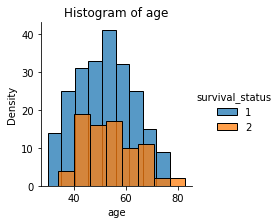

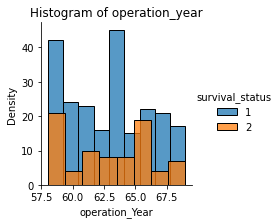

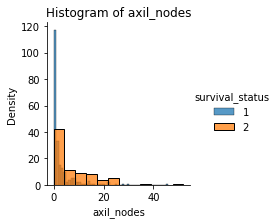

In [5]:
sns.FacetGrid(haberman_df, hue = "survival_status", height = 3).map(sns.histplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

sns.FacetGrid(haberman_df, hue = "survival_status", height = 3). map(sns.histplot, "operation_Year").add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

sns.FacetGrid(haberman_df, hue = "survival_status", height = 3).map(sns.histplot, "axil_nodes").add_legend()
plt.title("Histogram of axil_nodes")
plt.ylabel("Density")
plt.show()

***PDF & CDF***

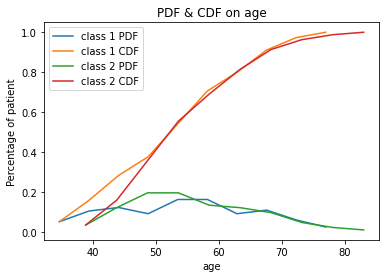

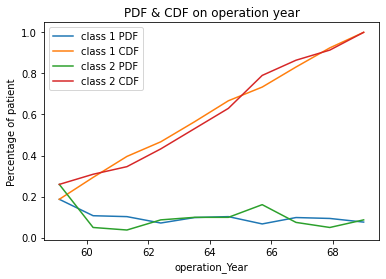

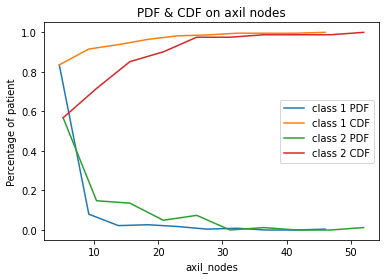

In [6]:
class1 = haberman_df.loc[haberman_df["survival_status"] == 1]
class2 = haberman_df.loc[haberman_df["survival_status"] == 2]
label = ["class 1 PDF", "class 1 CDF", "class 2 PDF", "class 2 CDF"]

#Age
counts, bin_edges = np.histogram(class1["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("PDF & CDF on age")
plt.xlabel("age")
plt.ylabel("Percentage of patient")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(class2["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show()

#operation_Year
counts, bin_edges = np.histogram(class1["operation_Year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(class2["operation_Year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("PDF & CDF on operation year")
plt.xlabel("operation_Year")
plt.ylabel("Percentage of patient")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show();

#axil_nodes
counts, bin_edges = np.histogram(class1["axil_nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(class2["axil_nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("PDF & CDF on axil nodes")
plt.xlabel("axil_nodes")
plt.ylabel("Percentage of patient")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show();

**BOXplot**

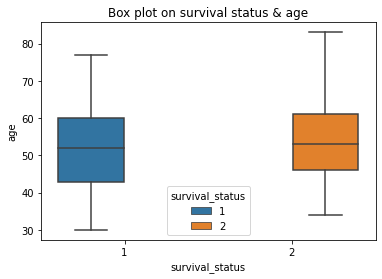

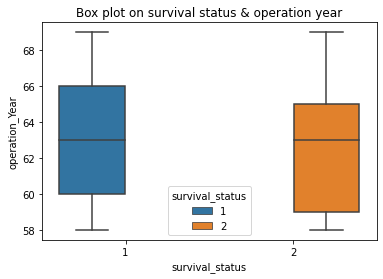

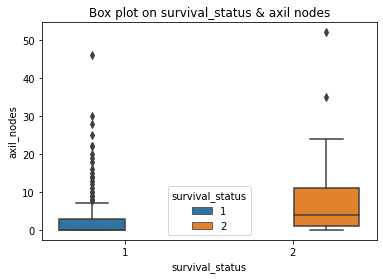

In [7]:
sns.boxplot(x = "survival_status", y = "age", hue = "survival_status", data = haberman_df).set_title("Box plot on survival status & age")
plt.show()
sns.boxplot(x = "survival_status", y = "operation_Year", hue = "survival_status", data = haberman_df).set_title("Box plot on survival status & operation year")
plt.show()
sns.boxplot(x = "survival_status", y = "axil_nodes", hue = "survival_status", data = haberman_df).set_title("Box plot on survival_status & axil nodes")
plt.show()

***Violin Plot***

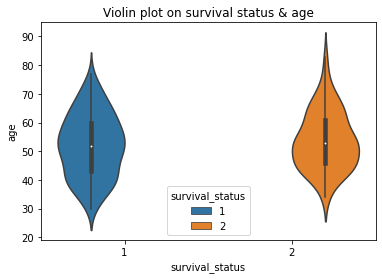

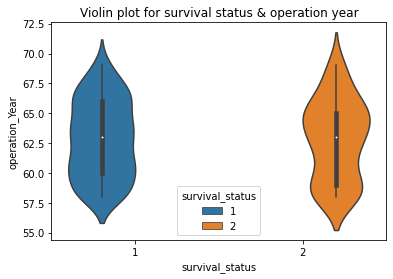

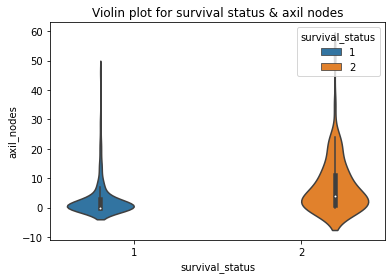

In [8]:
sns.violinplot(x = "survival_status", y = "age", hue = "survival_status", data = haberman_df)
plt.title("Violin plot on survival status & age")
plt.show()

sns.violinplot(x = "survival_status", y = "operation_Year", hue = "survival_status", data = haberman_df)
plt.title("Violin plot for survival status & operation year")
plt.show()

sns.violinplot(x = "survival_status", y = "axil_nodes", hue = "survival_status", data = haberman_df)
plt.title("Violin plot for survival status & axil nodes")
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


**Scatter Plot**

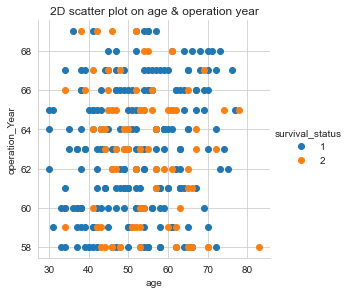

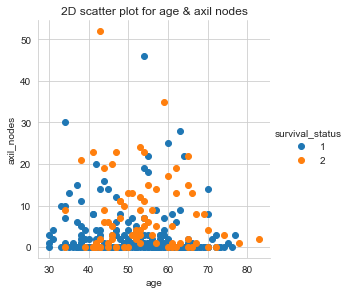

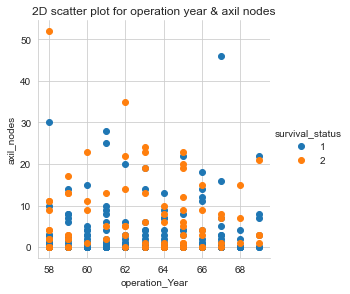

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman_df, hue = "survival_status", height = 4).map(plt.scatter, "age", "operation_Year").add_legend()
plt.title("2D scatter plot on age & operation year")
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(haberman_df, hue = "survival_status", height = 4).map(plt.scatter, "age", "axil_nodes").add_legend()
plt.title("2D scatter plot for age & axil nodes")
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(haberman_df, hue = "survival_status", height = 4).map(plt.scatter, "operation_Year", "axil_nodes").add_legend()
plt.title("2D scatter plot for operation year & axil nodes")
plt.show()

**Pair plot**


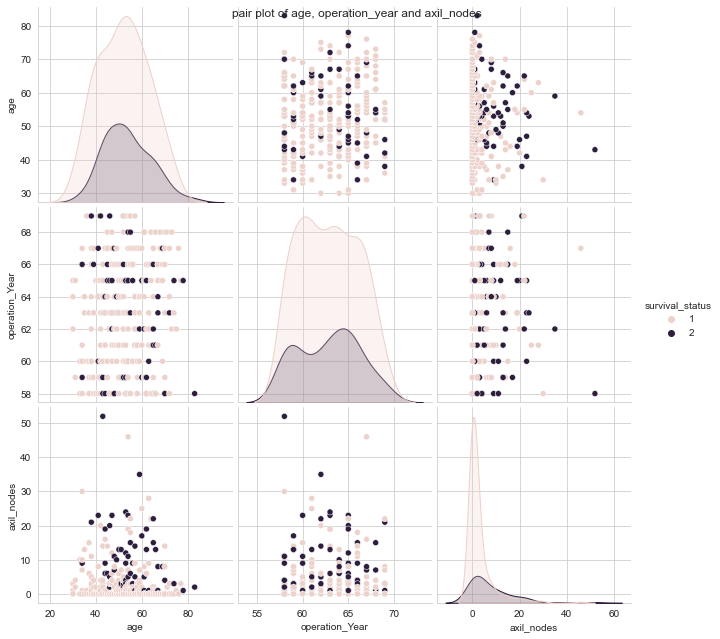

In [10]:
sns.set_style("whitegrid")
sns.pairplot(haberman_df, hue = "survival_status", vars = ["age", "operation_Year", "axil_nodes"], height = 3)
plt.suptitle("pair plot of age, operation_year and axil_nodes")
plt.show()

### 1.5 Summarization of final conclusions of the Exploration

The Haberman's Survival Data Set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

***Total Number of points:*** Total 306 datapoints for each class are present in this data set. 

***Total Number of Attributes:*** 4 (including the class attribute)

***Total numer of features:*** Total 3 features are present in this data set named ['age', 'operation_Year', 'axil_nodes']

***Total number of classes:*** Total 2 classes are present for Survival status; 1 and 2 (i.e. how many of the patient survived and not survived

***Survival status (class attribute):*** 1 = the patient survived 5 years or longer and 2 = the patient died within 5 year

This dataset is a collection of 306 patients who had undergone surgery for breast cancer.

The patients were of age range 30 yrs to 83 yrs with the average age of 52 years.

The first surgery happened in 1958 and the last one is in 1969.

An average of 4 positive axillary nodes detected in one patient. There are very few patients that have more than 25 axillary nodes.

If there are fewer axillary nodes, the odds of survival increase. However, having no axillary nodes does not guarantee survival.

A total of 225 patient survived 5 years or longer and 81 patient died within 5 years of surgery.

The patient's age and the year of operations are not determinants of survival. Patients under the age of 35, however, have a better chance of surviving.

The majority of the operations are performed between 1960 and 1964 were on patients between the ages of 45 and 55.

There are no missing values for any column.

Dataset is imbalanced. Better conclusions can be drawn if the data are balanced.